## EX02

##### Calculate the variance of each skill; add up the variances to see how many components needed to reach 90; display a graph representing the addition of your variances

In [2]:
## QUICKSTART CHUNK (from ex01 of this assignment)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

df_test = pd.read_csv("../Test_knight.csv")
df_train = pd.read_csv("../Train_knight.csv")

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = df_train.drop('knight', axis=1)
X_train_scaled = scaler.fit_transform(X_train)
df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_train_scaled['knight'] = df_train['knight'].values  # Add back the target column
df_train_scaled = df_train_scaled.round(2)
df_train_scaled.head(15)

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,0.23,0.26,0.22,0.12,0.34,0.14,0.07,0.09,0.40,0.24,...,0.38,0.18,0.09,0.35,0.14,0.12,0.18,0.37,0.17,Sith
1,0.61,0.42,0.60,0.47,0.44,0.28,0.35,0.52,0.26,0.09,...,0.57,0.68,0.54,0.53,0.28,0.43,0.82,0.36,0.14,Jedi
2,0.19,0.25,0.19,0.10,0.32,0.31,0.22,0.20,0.22,0.38,...,0.45,0.20,0.07,0.45,0.37,0.38,0.53,0.29,0.26,Sith
3,0.22,0.29,0.23,0.11,0.70,0.43,0.24,0.31,0.45,0.53,...,0.41,0.19,0.08,0.71,0.25,0.25,0.49,0.33,0.25,Sith
4,0.20,0.34,0.19,0.10,0.26,0.07,0.01,0.03,0.29,0.31,...,0.44,0.13,0.06,0.26,0.05,0.02,0.10,0.30,0.14,Sith
5,0.53,0.41,0.51,0.37,0.11,0.22,0.26,0.32,0.36,0.08,...,0.39,0.39,0.26,0.11,0.16,0.20,0.32,0.24,0.07,Jedi
6,0.38,0.54,0.37,0.24,0.49,0.26,0.29,0.36,0.30,0.34,...,0.65,0.35,0.21,0.63,0.20,0.32,0.52,0.33,0.26,Jedi
7,0.60,0.39,0.60,0.45,0.59,0.47,0.46,0.70,0.51,0.23,...,0.41,0.51,0.37,0.48,0.39,0.36,0.84,0.62,0.21,Jedi
8,0.61,0.36,0.60,0.45,0.51,0.37,0.33,0.52,0.37,0.28,...,0.40,0.55,0.36,0.47,0.29,0.33,0.55,0.30,0.24,Jedi
9,0.27,0.08,0.26,0.15,0.30,0.12,0.06,0.13,0.26,0.30,...,0.15,0.19,0.09,0.40,0.13,0.07,0.28,0.36,0.26,Sith


In [7]:
## EXERCISE 02 - PCA Variance Analysis

from sklearn.decomposition import PCA

# Prepare the features (without the target column)
X_features = df_train_scaled.drop('knight', axis=1)

# Calculate the variance of each skill (feature)
skill_variances = X_features.var()
print("Variance of each skill:")
print(skill_variances)
print(f"\nTotal number of skills: {len(skill_variances)}")

# Add up the variances to see how many components needed to reach 90%
total_variance = skill_variances.sum()
print(f"Total variance: {total_variance:.4f}")
print(f"90% of total variance: {total_variance * 0.9:.4f}")


Variance of each skill:
Sensitivity      0.026169
Hability         0.019737
Strength         0.026623
Power            0.020707
Agility          0.033726
Dexterity        0.031355
Awareness        0.034236
Prescience       0.042678
Reactivity       0.017941
Midi-chlorien    0.023799
Slash            0.010773
Push             0.014776
Pull             0.009797
Lightsaber       0.007933
Survival         0.009891
Repulse          0.025921
Friendship       0.006459
Blocking         0.013766
Deflection       0.018979
Mass             0.007767
Recovery         0.027415
Evade            0.033205
Stims            0.026138
Sprint           0.017453
Combo            0.022840
Delay            0.024229
Attunement       0.029613
Empowered        0.050506
Burst            0.030315
Grasping         0.014726
dtype: float64

Total number of skills: 30
Total variance: 0.6795
90% of total variance: 0.6115


In [ ]:
# Apply PCA with all components to get the full picture
pca_full = PCA()
pca_full.fit(X_features)
# Get explained variance ratio for each component
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Display the solution to your variance needed to reach 90%
components_for_90 = np.argmax(cumulative_variance >= 0.9) + 1
print(f"\nNumber of components needed to reach 90% variance: {components_for_90}")


Number of components needed to reach 90% variance: 6


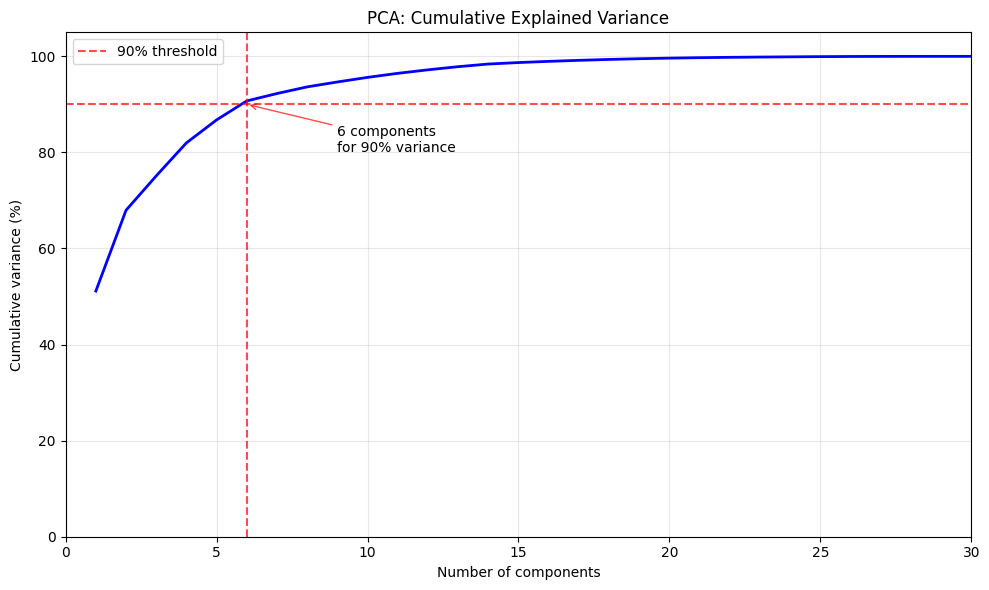


SOLUTION SUMMARY:
• Total number of original features: 30
• Components needed for 90% variance: 6
• Variance reduction: 24 fewer dimensions
• Variance captured: 90.72%


In [10]:
# Create the variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, 'b-', linewidth=2)
plt.axhline(y=90, color='r', linestyle='--', alpha=0.7, label='90% threshold')
plt.axvline(x=components_for_90, color='r', linestyle='--', alpha=0.7)
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance (%)')
plt.title('PCA: Cumulative Explained Variance')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, len(cumulative_variance))
plt.ylim(0, 105)

# Add annotation for the 90% point
plt.annotate(f'{components_for_90} components\nfor 90% variance', 
             xy=(components_for_90, 90), 
             xytext=(components_for_90 + 3, 80),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7))

plt.tight_layout()
plt.show()

# Display a graph representing the solution of your variances
print("\n" + "="*50)
print("SOLUTION SUMMARY:")
print("="*50)
print(f"• Total number of original features: {len(X_features.columns)}")
print(f"• Components needed for 90% variance: {components_for_90}")
print(f"• Variance reduction: {len(X_features.columns) - components_for_90} fewer dimensions")
print(f"• Variance captured: {cumulative_variance[components_for_90-1]*100:.2f}%")

## Principal Component Analysis (PCA) with Scikit-Learn

Principal Component Analysis (PCA) is a powerful dimensionality reduction technique available in scikit-learn through the `sklearn.decomposition.PCA` class. PCA transforms high-dimensional data into a lower-dimensional space while preserving the most important variance in the dataset.

### Key Features of PCA

**Dimensionality Reduction**: PCA reduces the number of features by creating new variables (principal components) that are linear combinations of the original features. These components capture the maximum variance in the data.

**Variance Preservation**: The first principal component explains the most variance, the second explains the second most, and so on. This allows you to retain most of the dataset's information with fewer dimensions.

### Common Parameters

- `n_components`: Number of components to keep (integer or float for variance ratio)
- `random_state`: Ensures reproducible results
- `whiten`: Removes correlation between components

### Basic Usage

```python
from sklearn.decomposition import PCA

# Create PCA instance
pca = PCA(n_components=2)

# Fit and transform data
X_reduced = pca.fit_transform(X)

# Access explained variance ratio
print(pca.explained_variance_ratio_)
```

### Applications

PCA is commonly used for:
- **Data visualization**: Reducing data to 2D or 3D for plotting
- **Noise reduction**: Removing less important components
- **Feature extraction**: Creating new meaningful features
- **Preprocessing**: Before applying machine learning algorithms

### Choosing Components

A common approach is to select components that explain a certain percentage of variance (e.g., 90% or 95%). This balances dimensionality reduction with information preservation, making it an essential tool for data scientists working with high-dimensional datasets.